# More with Numpy
In the 2nd part of this book, we will study the numerical methods by using Python. We will use array/matrix a lot later in the book. Therefore, here we are going to introduce the most common way to handle arrays in Python using the [Numpy module](http://www.numpy.org). Numpy is probably the most fundamental numerical computing module in Python. 

NumPy is important in scientific computing, it is coded both in Python and C (for speed). On its website, a few important features for Numpy is listed:

* a powerful N-dimensional array object
* sophisticated (broadcasting) functions
* tools for integrating C/C++ and Fortran code
* useful linear algebra, Fourier transform, and random number capabilities

**Scipy** is the complimentary package which we will also use quite a lot. As a rule of thumb, if something is covered in a general textbook on numerical computing, it’s probably implemented in SciPy.

As always, let's start with some imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt #We will also be making some plots to demonstrate numpy functions.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import matplotlib.pyplot  as plt   
## remember that if you knew --for some very weird case-- that you only need 1 or 2 packages you could just import
## those with: from matplotlib.pyplot import plot or (plot, xlabel, ylabel...)

In [4]:
np.max?

Signature:      
np.max(
    a,
    axis=None,
    out=None,
    keepdims=<no value>,
    initial=<no value>,
    where=<no value>,
)
Call signature:  np.max(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function max at 0x107259080>
File:            /opt/anaconda3/lib/python3.13/site-packages/numpy/_core/fromnumeric.py
Docstring:      
Return the maximum of an array or maximum along an axis.

Parameters
----------
a : array_like
    Input data.
axis : None or int or tuple of ints, optional
    Axis or axes along which to operate.  By default, flattened input is
    used.

    .. versionadded:: 1.7.0

    If this is a tuple of ints, the maximum is selected over multiple axes,
    instead of a single axis or all the axes as before.
out : ndarray, optional
    Alternative output array in which to place the result.  Must
    be of the same shape and buffer length as the expected output.
    See :ref:`ufuncs-output-type` for more details.

keepdims : bool, opt

## Array Creation

**Recall** We've already learned a few ways to create arrays. Let's look at some examples:


In [5]:
x_1d = np.arange( 3, 50.1, 0.1 ) #Creates a 1D array starting on 3 and ending on 50 with a step of 0.1.
y_1d = np.linspace(0,10,num = 471) #Creates a 1D array with 471 evenly spaced elements from 0 to 10.
my_list = [1,2,3]
z_1d = np.array(my_list) #Creates an array from a list

z_2d = np.array([[1,2,3],[4,5,6],[7,8,9]]) #Creates a 2D array from a list of lists.
z_2 = np.reshape(np.arange(1,10,1),(3,3))

In [6]:
print(x_1d[0:5],'... \n',y_1d[0:5],'...\n',z_1d,'\n \n',z_2d,'\n \n',z_2)

[3.  3.1 3.2 3.3 3.4] ... 
 [0.         0.0212766  0.04255319 0.06382979 0.08510638] ...
 [1 2 3] 
 
 [[1 2 3]
 [4 5 6]
 [7 8 9]] 
 
 [[1 2 3]
 [4 5 6]
 [7 8 9]]


### Array are better equiped for math than lists

**TRY IT!** Try multiplying our array, z_1d and a list version by the scalar 10. Does 10 distribute to all elements? 

In [7]:
zlist = list(z_1d)

print(z_1d*10)
print(zlist*10)

[10 20 30]
[np.int64(1), np.int64(2), np.int64(3), np.int64(1), np.int64(2), np.int64(3), np.int64(1), np.int64(2), np.int64(3), np.int64(1), np.int64(2), np.int64(3), np.int64(1), np.int64(2), np.int64(3), np.int64(1), np.int64(2), np.int64(3), np.int64(1), np.int64(2), np.int64(3), np.int64(1), np.int64(2), np.int64(3), np.int64(1), np.int64(2), np.int64(3), np.int64(1), np.int64(2), np.int64(3)]


It looks like the list creates 10 copies of the original list. This may be good for some programming tasks but in general the numpy array behaves much more like we would expect from math.

### Lists are not arrays. 
To do numerical computations with their elements we need to call them one by one. 
You need a *for loop* or this: [i*10 for i in x_list] and you will get the same results as with x_numpy * 10. 
We will study *for loops* in more detail next week.


In [8]:
z10a = []
for i in range( len( zlist ) ):
    z10a.append( zlist[i] * 10 )

print(z10a)
#or

z10b = []
for num in zlist: z10b.append(num*10)

print(z10b)

[np.int64(10), np.int64(20), np.int64(30)]
[np.int64(10), np.int64(20), np.int64(30)]


In [9]:
#or even simpler: 
[ i*10 for i in zlist ]   # ---> "list comprehension" we will get to this later in the course.

[np.int64(10), np.int64(20), np.int64(30)]

### But *for loops* are slow!

Let's make a larger array and time some calculations on it. We will use time which is called a *magic function*


In [10]:
%%time
a_np = np.arange(1, 2.4e6, 1)   ### note I keep this one small....try pushing it to 1,000,000 and see the
                                        ### difference even more obv 

CPU times: user 9.58 ms, sys: 10.1 ms, total: 19.7 ms
Wall time: 17.2 ms


and a similar new list:


In [11]:
%%time
a_list = list( range( 1, int(2.4e6), 1) )

CPU times: user 58.9 ms, sys: 35.1 ms, total: 94 ms
Wall time: 97 ms


Now let's replace each number in the array/list with its cube:


In [12]:
%%time
a_np = a_np**3.

CPU times: user 72.3 ms, sys: 12.9 ms, total: 85.2 ms
Wall time: 84.9 ms


In [13]:
%%time
for i in range(len(a_list)): a_list[i] = a_list[i]**3


CPU times: user 584 ms, sys: 36.4 ms, total: 621 ms
Wall time: 647 ms


Let's replace each element with the square root:

In [14]:
%%time

a_np = np.sqrt(a_np)


CPU times: user 7.36 ms, sys: 4.07 ms, total: 11.4 ms
Wall time: 8.18 ms


In [15]:
%%time

for i in range(len(a_list)): a_list[i] = np.sqrt(a_list[i])


CPU times: user 5.39 s, sys: 115 ms, total: 5.5 s
Wall time: 5.77 s


It takes (much) longer to do this with a list than with numpy!

### Practice:

### another example of the power of numpy (and of tricky bugs): 
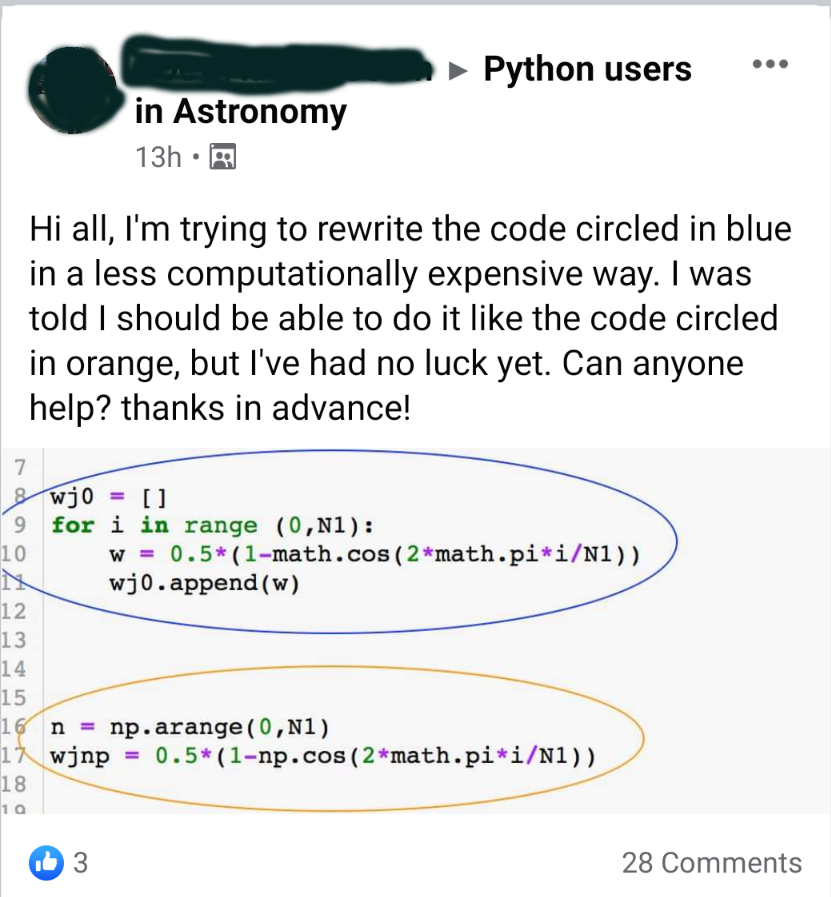


In [16]:
# let's test what this person does in the start (since we imported numpy we 'll use np.cos):
wj0 = []
N1 = 500000

In [17]:
print( wj0)

[]


In [18]:
%%time
for i in range( 0, N1 ):   ## create a range 0 to N1. Then for every element in the range scan it 1 by 1 and assign
                           ## that value to i
    w = 0.5 * ( 1 - np.cos( 2 * np.pi * i / N1 ) )  ## use this value to make a cos function of i 
    wj0.append( w )        ## append it to the end of the list to make your list

CPU times: user 948 ms, sys: 30.6 ms, total: 978 ms
Wall time: 1.01 s


In [19]:
%%time 
# now let's numpy it:
n = np.arange(0, N1, 1)

# instead of looping over i we create an array of all the x-variables :
# and then we make the numpy cos array:

wj02 = 0.5 * ( 1 - np.cos( 2 * np.pi * n / N1 ) )



CPU times: user 12.2 ms, sys: 7.49 ms, total: 19.7 ms
Wall time: 20.6 ms


In [20]:
# done in a fraction of the time that the appending to list needed....if for whatever 
# reason you *needed* a list you can always list() it:

print(np.subtract(wj02,np.array(wj0)))
print(wj02,type(wj02),type(wj0))

[0. 0. 0. ... 0. 0. 0.]
[0.00000000e+00 3.94784205e-11 1.57913682e-10 ... 3.55305785e-10
 1.57913682e-10 3.94784205e-11] <class 'numpy.ndarray'> <class 'list'>


### Creating zero arrays, unit arrays, and incremented arrays.

In [21]:
x = np.zeros( 10 )
print(x)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [22]:
y = np.arange( 10 )  
z = np.ones((3,11))
print(y,'\n')
print(z)

[0 1 2 3 4 5 6 7 8 9] 

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


### How does numpy treat these arrays for the numerical calculations?  

In [29]:
# make array sum_xy whose elements are the sum of the corresponding elements of x times 2 and y times 3

In [30]:
sum_xy = ( x * 2 ) + ( y * 3)

In [31]:
print( sum_xy )

[ 0.  3.  6.  9. 12. 15. 18. 21. 24. 27.]


You can check the shape of your array out with: .shape

In [32]:
print( z.shape )

(3, 11)


In [34]:
#try:
z = z + 5
print(z)

[[16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16.]
 [16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16.]
 [16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16.]]


**TRY IT!** Multiply x by y.

In [35]:
print(x*y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


**TRY IT!** Multiply z by y. What happens? Why doesn’t it work?

In [36]:
print(z.shape, y.shape)


(3, 11) (10,)


I wouldn't know how to multiply these things either! What if we use the first 10 columns of $z$?

In [57]:
print(z[:,0:10].T.shape)
product = z[:,0:10] * y
print(product)

(10, 3)
[[ 0.  6. 12. 18. 24. 30. 36. 42. 48. 54.]
 [ 0.  6. 12. 18. 24. 30. 36. 42. 48. 54.]
 [ 0.  6. 12. 18. 24. 30. 36. 42. 48. 54.]]


It worked thanks to array brodcasting!


In [58]:
print(product)

[[ 0.  6. 12. 18. 24. 30. 36. 42. 48. 54.]
 [ 0.  6. 12. 18. 24. 30. 36. 42. 48. 54.]
 [ 0.  6. 12. 18. 24. 30. 36. 42. 48. 54.]]


Of course, this is NOT matrix multiplication which follows:

$P = ZY : P_{i,j} = \sum_{k = 0}^N{Z_{i, k} \cdot Y_{j, k}}$

or the sum of the products of the elements of Z's row elements by Y's column elements.

We could do that too though:

In [37]:
p = np.matmul(z[:,0:10],y)

print(p)

[720. 720. 720.]


In [38]:
# try this:

a1 = np.array( [ [1, 2] , 
                 [3, 4] ] )
b1 = np.ones( ( 2, 2 ) )

print( a1 )
print( b1 )


[[1 2]
 [3 4]]
[[1. 1.]
 [1. 1.]]


In [147]:
print( a1 * b1 )

[[1. 2.]
 [3. 4.]]


How does “ \* ” work?

“ \* ” does element by element multiplication, NOT matrix multiplication. The different dimensions of your x and z arrays means that * cannot operate as it should. Python gives an error message to warn you that you try something “illegal”. 



**TRY IT!** ...and how about the matrix product of $a_1 \times b_1$?

In [39]:
print ( np.matmul ( a1, b1 ) )

[[3. 3.]
 [7. 7.]]


### Broadcasting
When some conditions are met, Python will allow you to multiply arrays that have different dimensions. The smaller array is broadcast across the larger array so that they have compatible shapes. For example, create an array 


In [40]:
z_2 = np.array( [ 5 ] )

In [41]:
print( z_2.size, type( z_2 ) )

1 <class 'numpy.ndarray'>


**Try it!** add $z_2$ to your array $z$.  Following the strict rules of math this should not work! However, Python allows you to do this using broadcasting:

In [42]:
print( z_2 + z )

[[21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21.]
 [21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21.]
 [21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21.]]


What it does is it ‘creates’ a (3,11) array of 5's and adds it to your array $z$ following the element-by-element rules of matrix addition (same for multiplication etc). 


### More Numpy Functions

#### Practice
Let’s create 3 arrays:
x: goes from 0 to 40 with a step of 0.1
cosx: the cosine of x in radians 
sinx: the sine of x in radians

- Trig. functions always assume radians in Python. 

- You can convert back and forth with np.radians() and np.degrees() or simply multiplying/dividing by $\frac{\pi}{180}$.

In [46]:

x = np.arange(0,40.1,0.1)
cosx = np.cos(x)
sinx = np.sin(x)  #automatically in radians




#x     = np.degrees(np.arange( 0, 40, 0.1))
print(x)
#cosx  = np.cos(np.radians(x)) #x is in radians
#sinx  = np.sin(np.radians(x))

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1
 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5
 12.6 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9
 14.  14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.1 15.2 15.3
 15.4 15.5 15.6 15.7 15.8 15.9 16.  16.1 16.2 16.3 16.4 16.5 16.6 16.7
 16.8 16.9 17.  17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1
 18.2 18.3 18.4 18.5 18.6 18.7 18.8 18.9 19.  19.1 19.2 19.3 19.4 19.5
 19.6 

#### Practice

Plot them with cosine in blue and sine in green.

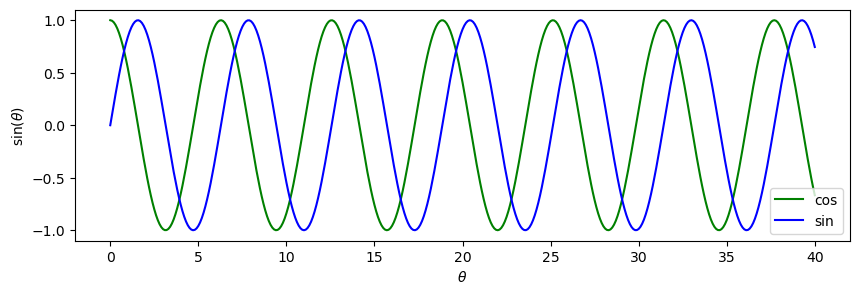

In [52]:
plt.figure( figsize = ( 10, 3 )  )
plt.plot( x, cosx, color= 'green', label = "cos"  ) 
plt.plot( x, sinx, color= 'blue', label = "sin" )
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\sin(\theta)$')
plt.legend()
#plt.xlim(0,5)

Let's slice out one period:


6.300000000000001


(0.0, 10.0)

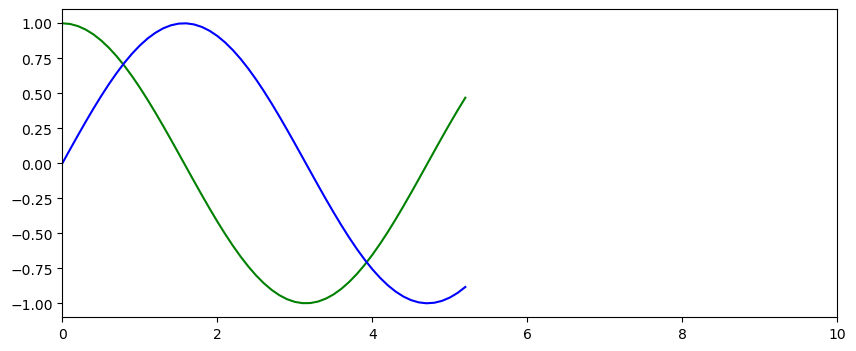

In [57]:
plt.figure( figsize = ( 10, 4 )  )
print(x[63])
plt.plot(x[0:63],cosx[0:63] , color= 'green' ) #1 radian is 2pi
plt.plot(x[0:63],sinx[0:63] , color= 'blue')
plt.xlim(0,10)

**WARNING** The plotted arrays must have the same number of elements so if you slice x you must also slice cosx and sinx.

In [58]:
x.shape

(401,)

In [62]:
#### Let's try the following
z = np.arange(0,21,1)
print(z)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [63]:
# print the z first:
print ( z )

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [64]:
# print z till 10 and z from 2 to 5
print( z [ : 10 ] ) # slicing, up to but not indlucing 10
print( z [ 1: 5  ] ) 
print( z [1:5] )

[0 1 2 3 4 5 6 7 8 9]
[1 2 3 4]
[1 2 3 4]


In [65]:
# print all elements from 6 onwards:

print( z[ 5 :  ] )

[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [66]:
# print z from 12 to 2 with a -2 step; print z from 10 to end with step of 2
print( z [ 11 : 0: -2 ] ) #up to but not including 0 
#print( z [  ] )

[11  9  7  5  3  1]


In [67]:
z[ 4 ] = 40 
z[ 11: 13] = 42
print( z )

[ 0  1  2  3 40  5  6  7  8  9 10 42 42 13 14 15 16 17 18 19 20]


### Boolean and *Masking* Arrays

**Example:** Print all values of cosx that are larger than 0.99:

In [68]:
# how would you do this?
cosx > 0.99 #tells T or F, gives array whos values are T and F

array([ True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,

In [69]:
# then:
print( cosx[ cosx>0.99 ] ) # to get those values, put in brakets of array

[1.         0.99500417 0.9965421  0.99985864 0.99318492 0.99779828
 0.99943459 0.99108487 0.99877236 0.99872797 0.99120281 0.99946405
 0.99773898 0.99328804 0.99987318 0.99646791 0.99509244 0.99999961
 0.99491511]


#### Multiple Conditions: 

In [70]:
z = np.arange(0,30)
print(z)
print(z[(z < 3) | (z >= 10)])# z less than 3, pipe "|" (means or), z greater equal to 10
# print(z[z<3) & (z>=10]) --> gives empty brakets, because it cant be true (no values =)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
[ 0  1  2 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]


#### If you want to know *where* (which elements of) an array meet a specific criterion use the numpy where statement:


In [74]:
xx =  np.where ( (z < 14) & (z >= 3) ) #indexies where values meet these conditions, return tuple
print(xx,type(xx)) # in tuple it returns array, 1D array
print(xx[0][3]) # to find value in array of indicies, access 0th element of tuple, then

(array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),) <class 'tuple'>
6


In [75]:
print( z[ np.where ( z < 14 ) ] )

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


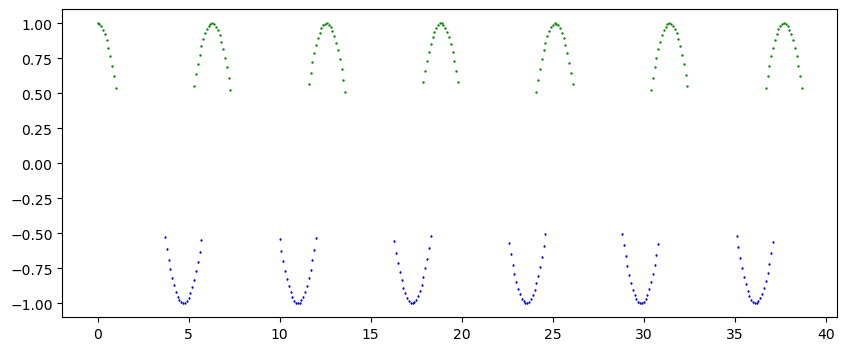

In [77]:
plt.figure( figsize = ( 10, 4 )  )
plt.scatter( x[ cosx > 0.5  ]  , cosx[ cosx > 0.5 ]  , s = .5, color= 'green', marker = 'o') 
plt.scatter( x[ sinx <= -0.5 ]  , sinx[ sinx <= -0.5]  , s = .5, color= 'blue', marker = 'd' )

### Masking in 2-dimensions:



In [79]:
tst1 = np.array( [ [ 1, 1, 1 ], [ 2, -2, 2 ], [ -4, -4, 4 ] ] )
tst2 = np.array( [ [ 1, 1, 1 ], [ 2, -2, 2 ], [ -3, 3, 3 ] ] ) #create 2D arrays

In [80]:
print( tst1, '\n\n', tst2 )

[[ 1  1  1]
 [ 2 -2  2]
 [-4 -4  4]] 

 [[ 1  1  1]
 [ 2 -2  2]
 [-3  3  3]]


In [81]:
q_tst1 = np.where( ( tst1 < 0 ) & ( tst2 < 0 ) )  #will give negative elemts

In [82]:
print( q_tst1 ) #still is a tuple, but tuple has 2 arrays, row indices and colum indidies

(array([1, 2]), array([1, 0]))


In [83]:
np.where( ( tst1 < 0 ) & ( tst2 < 0 ) )

(array([1, 2]), array([1, 0]))

In [84]:
np.where(  tst1 < 0 )

(array([1, 2, 2]), array([1, 0, 1]))

### Practice:

In [88]:
my_2d_array = np.array( [ [ 1  , 2 , 3 , 4 , 5  ], 
                          [ 12 , 15, 16, 22, 18 ], 
                          [ 42 , 54, 53, 67, 88 ] , 
                          [ -41, 36, 98, 10, 12 ]  ] )


In [89]:
print( my_2d_array)

[[  1   2   3   4   5]
 [ 12  15  16  22  18]
 [ 42  54  53  67  88]
 [-41  36  98  10  12]]


**TRY IT!** How do you slice "53" from my_2d_array? 

In [91]:
my_2d_array [2,2] #first row, then colum, start counting at 0

#print(np.where(my_2d_array == 53))
#print(my_2d_array[2,2])

np.int64(53)

**TRY IT!** How do you slice "98" from my_2d_array? 

In [92]:
my_2d_array [3,2]
#print(my_2d_array[3,2])

np.int64(98)

**TRY IT!** How do you get the slice containing 16, 22, 53, 67?
my_2d_array[1:3,2:4]

In [93]:
my_2d_array [1:3,2:4] #row, 1 up to 2 not including 3, column 2 up to 3 not including 4


#print(my_2d_array[1:3,2:4])

array([[16, 22],
       [53, 67]])

### Practice:

In [47]:
a = np.array([[0, 1, 2],
              [0, 6, 4],
              [0, 3, 5]])

b = np.transpose(a)

print(a, '\n\n', b)

[[0 1 2]
 [0 6 4]
 [0 3 5]] 

 [[0 0 0]
 [1 6 3]
 [2 4 5]]


**TRY IT!** How do you get the slice containing the values of $a$ that are greater than 2?

In [49]:
locations = np.where(a > 2)
print(a[locations],locations)

[6 4 3 5] (array([1, 1, 2, 2]), array([1, 2, 1, 2]))


**TRY IT!** Get the values of $b$ that are in the places where $a$ is greater than 2.

In [50]:
print(b[locations])

[6 3 4 5]


### Practice:
Multiply $a$ by 2, subtract 100 from $b$ and sum the results. Assign the answer to the variable $c$. 

In [55]:
c = a*2 + (b - 100)


In [56]:
print(c)

[[-100  -98  -96]
 [ -99  -82  -89]
 [ -98  -90  -85]]


Calculate and print the min of $c$, its max, and its mean:

In [57]:
print(np.min(c),np.max(c),np.mean(c))

-100 -82 -93.0


Print the mean of the base 10 logarithm of absolute value of $c$.

In [59]:
print(np.mean(np.log10(np.abs(c))))

1.9674693192449284


### Reading Data with Numpy.

One of the great features of numpy is that it also allows you to read data in an array in a single command. You do that with np.loadtxt( "name_of_file" ) [see also: https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html ] or np.genfromtxt("name_of_file") [see also: https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html ]. 

**TRY IT!** Find the file *my_first_data.dat*. It should already be in your file folder. Open it with a text editor to see what it looks like. 
- Read it in an array *all_input_data* with loadtxt or genfromtxt. 
- Check what your array looks like (print it). 
- Print all times each car traveled. 
- Assuming each car travelled at it's top speed (constant), print all distances the cars traveled. 
- Calculate the distance each car traveled **in a single line** and asign it to array *distances_traveled*. 
- Print *distances_traveled*

In [94]:
all_input_data = np.loadtxt( 'my_first_data.dat')

In [96]:
print(all_input_data) # 5 by 3 element array

[[  1.    5.2 120.2]
 [  2.    3.1 110. ]
 [  3.    2.4 100.5]
 [  4.    5.1  65.3]
 [  5.    2.4 119.6]]


In [67]:
print( all_input_data )

[[  1.    5.2 120.2]
 [  2.    3.1 110. ]
 [  3.    2.4 100.5]
 [  4.    5.1  65.3]
 [  5.    2.4 119.6]]


In [97]:
print( all_input_data[ :, 1 ] ) #slice out just time

[5.2 3.1 2.4 5.1 2.4]


In [98]:
distance_traveled =  all_input_data[ :, 1 ] * all_input_data[ :, 2 ] #time, times speed = dist traveled

In [99]:
print( distance_traveled )

[625.04 341.   241.2  333.03 287.04]


### Now let's try genfromtxt with different data: 

**TRY IT!** Find the file *test_genfromtxt.dat*. It should also already be in your file folder. Open it with a text editor to see what it looks like. 
- Read data into variable student_data. 
- Print the IDs of the students. 
- Print the average quiz  grade for student 202204. 
- Print the average quiz grade and the IDs of all students that passed the class with a C- or better ( average total of more than 7.0).

In [100]:
student_data = np.genfromtxt( 'test_genfromtxt.dat' )

In [101]:
print( student_data )

[[2.02201e+05 8.10000e+00 8.40000e+00 8.20000e+00]
 [2.02202e+05 7.50000e+00 7.00000e+00 7.30000e+00]
 [2.02203e+05 7.90000e+00 8.50000e+00 8.40000e+00]
 [2.02204e+05 9.50000e+00 9.70000e+00 9.70000e+00]
 [2.02205e+05 5.30000e+00 6.00000e+00 5.90000e+00]
 [2.02206e+05 5.10000e+00 7.10000e+00 6.80000e+00]]


In [102]:
#Student ID  Average-Grade-Quiz  Average-Grade-Exam    Average-Total

In [103]:
IDs = student_data[ :, 0 ]
print( IDs )

[202201. 202202. 202203. 202204. 202205. 202206.]


In [106]:
print( student_data[ 3, 1 ] )
gt7 = student_data[:,3] > 7
print(student_data[gt7,3])

9.5
[8.2 7.3 8.4 9.7]


In [107]:
student_data[student_data[:,3] > 7]
student_data[ :, 3 ] > 7 

array([ True,  True,  True,  True, False, False])

In [108]:
print( student_data )

[[2.02201e+05 8.10000e+00 8.40000e+00 8.20000e+00]
 [2.02202e+05 7.50000e+00 7.00000e+00 7.30000e+00]
 [2.02203e+05 7.90000e+00 8.50000e+00 8.40000e+00]
 [2.02204e+05 9.50000e+00 9.70000e+00 9.70000e+00]
 [2.02205e+05 5.30000e+00 6.00000e+00 5.90000e+00]
 [2.02206e+05 5.10000e+00 7.10000e+00 6.80000e+00]]


In [109]:
np.where( student_data[ :, 3 ] > 7  ) #where overall avg gt7 

(array([0, 1, 2, 3]),)

In [268]:
print( student_data[ np.where( student_data[ :, 3 ] > 7  ) , 1 ])

[[8.1 7.5 7.9 9.5]]


In [269]:
print( student_data[ np.where( student_data[ :, 3 ] > 7  ) , 0 ])

[[202201. 202202. 202203. 202204.]]


In [270]:
print( student_data[  student_data[ :, 3 ] > 7  , 1 ])

[8.1 7.5 7.9 9.5]


The follow text looks like output: `"Hello world"`

### Practice:
- Create a function that calculates the y-component of the velocity for projectiles on Earth and neglecting air resistance.

  Assume the inputs are arrays: `y_0` (initial heights) and `v_0y` (the y-component of the initial velocity) 
  from a height h. Use the kinematic equation:

  $v_f^2 = v_0^2 + 2 a_y \Delta y$,

  where $a_y = -g = -9.8 \mathrm{\frac{m}{s^2}}$ and all quantities are in SI units.

- Call your function for 10 objects with heights ranging from 0 - 10 m (including 10 m) and 10 velocities ranging from 5 m/s – -5 m/s (reverse order)



In [112]:
def projectile(y_0 = None, v_0y = None): #key arguments, define as none if not given
    """Calculates the y component of the velocity of a projectile (or projectiles)
    on Earth, with g =-9.8m/s^2, when they reach y=0
    Input: y_0 = intial height
           v_0y = y-component of intial velocity 

    Output: v_fy = y-component of final velocity
    """
    g = -9.8  #m/s^2
    delta_y = 0 - y_0 #y final - y inital
    v_fy = np.sqrt(v_0y**2  +  2*g*delta_y)
    return v_fy

    
#def v_final_y(y_0,v_0y):
    """
    Calculates the y-component of an object (or objects) final velocity (velocities) at y_f = 0 m.
    Input: 
    initial height(s) [array]
    initial velocity y-component [array]
    Output:
    final velocity y-component [array]
    """
 #   y_f = 0 #ends at ground level
  #  delta_y = y_f - y_0 #y displacement
   # v_f = np.sqrt(v_0y**2 - 2*9.8*delta_y
    #return v_f



In [120]:
height = np.arange(0,11,1)
vinit = np.arange(5,-6,-1)
vf_y = projectile(y_0= height, v_0y = vinit)
print(vf_y)


[ 5.          5.96657356  6.94262198  7.9246451   8.91066776  9.89949494
 10.89036271 11.88276062 12.87633488 13.87083271 14.86606875]


In [77]:
y_0 = np.arange(0,11,1)
v_0y = np.arange(5,-6,-1)
print(y_0,v_0y)

print(v_final_y(y_0,v_0y))

[ 0  1  2  3  4  5  6  7  8  9 10] [ 5  4  3  2  1  0 -1 -2 -3 -4 -5]
[ 2.23606798  4.85798312  6.49615271  7.79743548  8.91066776  9.89949494
 10.79814799 11.62755348 12.4016128  13.13011805 13.82027496]


### Practice:

- Create a function `c_mass` that calculates the 3D vector to the center of mass. The input should be a 1D array of $n$ masses   and a $3 \times n$ array of x, y, z coordinates for each mass (so each column is the coordinates of a single mass). Use the following equation:

  $\vec{r}_{cm} = \sum_{i = 0}^N{\frac{m_i\vec{r}_i}{m_i}}$

- call the function for 4 masses:

  - $m_1 = 23$ kg at $\vec{r}_1 = 3\hat{i} +  3\hat{j} + 3\hat{k}$
  - $m_2 = 3$ kg at $\vec{r}_2 = 0\hat{i} +  0\hat{j} + 8\hat{k}$
  - $m_3 = 8$ kg at $\vec{r}_3 = -1\hat{i} + 1\hat{j} + -4\hat{k}$
  - $m_4 = 2$ kg at $\vec{r}_4 = 0\hat{i} + 0\hat{j} + 0\hat{k}$

  and determine the vector from the origin to the center of mass.

In [121]:
def c_mass(masses,position_vectors): 
    """Blah blah my informative doc string...take in 3 x n array blah"""
    
    mass_weighted_positions = masses*position_vectors
    total_mass = np.sum(masses)
    center_of_mass = np.sum(mass_weighted_positions,1)/total_mass
    return center_of_mass
    

In [124]:
masses = np.array([23,3,8,2]) #kg 
positions = np.transpose(np.array([[3,3,3],[0,0,8],[-1,1,-4],[0,0,0]]))
print(positions)
print(positions.T)
print(masses,'\n\n',positions,np.shape(masses),np.shape(positions))

[[ 3  0 -1  0]
 [ 3  0  1  0]
 [ 3  8 -4  0]]
[[ 3  3  3]
 [ 0  0  8]
 [-1  1 -4]
 [ 0  0  0]]
[23  3  8  2] 

 [[ 3  0 -1  0]
 [ 3  0  1  0]
 [ 3  8 -4  0]] (4,) (3, 4)


In [125]:
mass_weighted_positions = masses*positions
print(mass_weighted_positions)

[[ 69   0  -8   0]
 [ 69   0   8   0]
 [ 69  24 -32   0]]


In [126]:
total_mass = np.sum(masses)
print(total_mass)
center_of_mass = np.sum(mass_weighted_positions,1)/total_mass
print(center_of_mass,np.shape(center_of_mass))

36
[1.69444444 2.13888889 1.69444444] (3,)


In [127]:
print(c_mass(masses,positions))

[1.69444444 2.13888889 1.69444444]


In [128]:
print(positions,positions.T)

[[ 3  0 -1  0]
 [ 3  0  1  0]
 [ 3  8 -4  0]] [[ 3  3  3]
 [ 0  0  8]
 [-1  1 -4]
 [ 0  0  0]]


In [133]:
a = -1.1e-10
b = "Hello World"
print(type(a), type(b))


<class 'float'> <class 'str'>


In [136]:
my_tup = (1, 'fish', [3.,4.,5.]) 
my_tup[1]

'fish'

In [138]:
import numpy as np
my_list = [1,2,3]
my_array = np.array(my_list)
type(my_array)

numpy.ndarray

In [140]:
print(my_list*3)
print(my_array*3)

[1, 2, 3, 1, 2, 3, 1, 2, 3]
[3 6 9]


In [142]:
my_2nd_array = np.arange(1,10,1)
my_2nd_array
my_2nd_array = np.reshape(my_2nd_array, (3,3))
my_2nd_array

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [143]:
i = 1
j = 2 
my_2nd_array[i,j]

np.int64(6)

In [144]:
# create function that calculuates volume of sphere in seperate .py file

import volume_sphere as vs


In [146]:
r = 10
print(vs.volume_s(r))
print(vs.area_s(3))

4188.790204786391
113.09733552923255


###  Practice:
Create a list student_h that contains lists with the heights of students in feet and inches. A person being 5' 6" would be noted as [5, 6], a person being 5' 10" would be noted as [5, 10]. Populate it with the heights of five students who are : 5’ 1”, 4’ 10”, 6’ 02”, 5’ 07”, and 6’ 11”. Create a function ft_to_m_cm that takes as input a value from student_h and returns each height in a new list [m, cm] (round cm up). Call the function for all values of student_h and print the results with an informative sentence (e.g., Student 1 has a height of 1 m 10 cm )  (Remember that 1 ft ~= 0.3048 m and 1 inch ~= 0.0254 m and 1m has 100cm). 

- Discuss: what should the function's input be? 
- What should its output be?
- What does the function need to calculate? How will it do that?
- Code it up!

In [ ]:
#make student_h list:

In [ ]:
#make your function:


In [ ]:
#calculate the heights in m and cm and print with informative statement: